In [10]:
from pydataset import data
iris = data("iris")

import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
seaborn.set_style("white")

%matplotlib inline



In [4]:
iris.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
pca.fit(scale(iris[iris.columns[:4]]))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:


print(pca.explained_variance_)
print(pca.explained_variance_ratio_)



[ 2.93808505  0.9201649   0.14774182  0.02085386]
[ 0.72962445  0.22850762  0.03668922  0.00517871]


In [8]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.938085,73.0,73.0
1,Dim2,0.920165,23.0,96.0
2,Dim3,0.147742,4.0,99.0
3,Dim4,0.020854,1.0,100.0


Text(3.25,26,'25%')

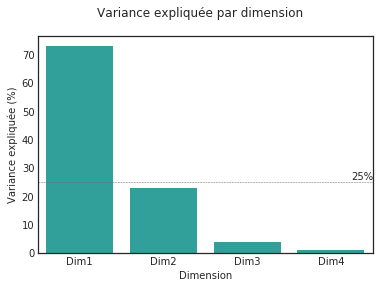

In [12]:
g_eig = seaborn.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [14]:
iris_pca = pca.transform(iris[iris.columns[:4]])


# Transformation en DataFrame pandas
iris_pca_df = pandas.DataFrame({
    "Dim1" : iris_pca[:,0], 
    "Dim2" : iris_pca[:,1], 
    "Species" : iris.Species
})

# Résultat (premières lignes)
iris_pca_df.head()




,Dim1,Dim2,Species
1,2.640270,5.204041,setosa
2,2.670730,4.666910,setosa
3,2.454606,4.773636,setosa
4,2.545517,4.648463,setosa
5,2.561228,5.258629,setosa


Text(0.5,0.98,'Premier plan factoriel')

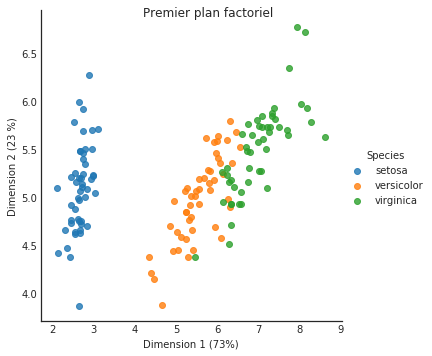

In [15]:
g_pca = seaborn.lmplot("Dim1", "Dim2", hue = "Species", data = iris_pca_df, fit_reg = False)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

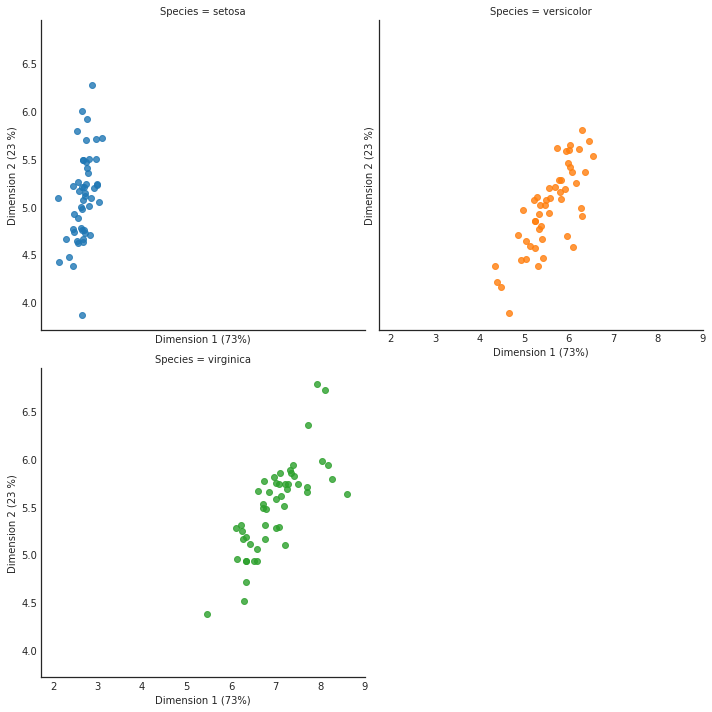

In [16]:
g_pca2 = seaborn.lmplot("Dim1", "Dim2", hue = "Species", col = "Species", col_wrap = 2, data = iris_pca_df, fit_reg = False)
g_pca2.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")